In [138]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
#loading the dataset
df = pd.read_csv('/content/train (1).csv')
df

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [141]:
#checking null values
df.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [142]:
#filling the missing values in columns
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [143]:
df['weight'] =df['weight'].fillna(df['weight'].mode()[0])

In [144]:
#removing lbs from weight column to convert dtype to int
df['weight'] = df['weight'].str.replace("lbs","")
#converting weight to int
df['weight']= df['weight'].astype(int)

In [145]:
#converting inch to cm
df['height'] = (df['height'].str.extract("(\d*)'(\d*)")
                   .apply(pd.to_numeric, errors='coerce') # or .astype(int)
                   .mul([30.48, 2.54]).sum(axis=1)
                  )
df['height']= df['height'].astype(int)

In [146]:
df

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,187,176,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,177,148,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,187,172,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,180,165,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,172,158,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,182,161,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,177,165,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,182,172,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,177,150,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [147]:
cols = ['penalties_conversion_rate','mental_strength','ball_controlling_skills',
        'jumping_skills','behaviour_rating','matches_played','fitness_rating',
        'years_of_experience','shot_accuracy']
for col in cols:
  df[col] = df[col].fillna(df[col].median())

In [148]:
mod_cols = ['strong_foot','coaching']
for col in mod_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  int64  
 6   weight                     13994 non-null  int64  
 7   ball_controlling_skills    13994 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13994 non-null  float64
 11  penalties_conversion_rate  13994 non-null  float64
 12  mental_strength            13994 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Text(0, 0.5, 'Total Selection')

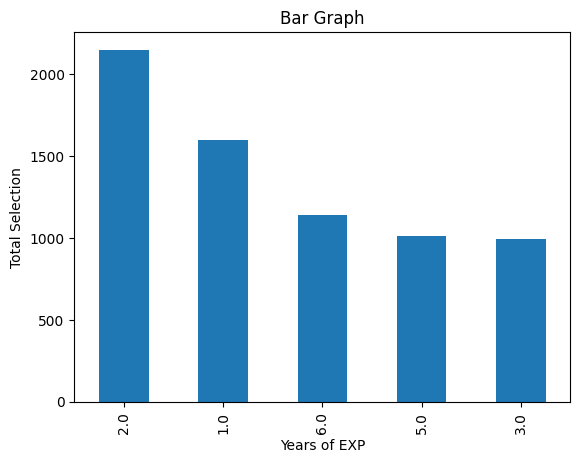

In [150]:
#plotting the total count of selection based on EXperience
df['years_of_experience'].value_counts().head().plot.bar()
plt.xlabel('Years of EXP')
plt.title('Bar Graph')
plt.ylabel('Total Selection')

Text(0.5, 1.0, 'Pie Chart')

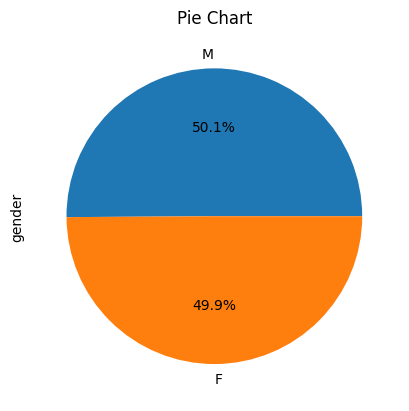

In [151]:
#percentage of selection based on Gender
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Pie Chart')

From the pie chart we can conclude that equal oppurtunities are being given for slection based on gender

<Axes: xlabel='height', ylabel='weight'>

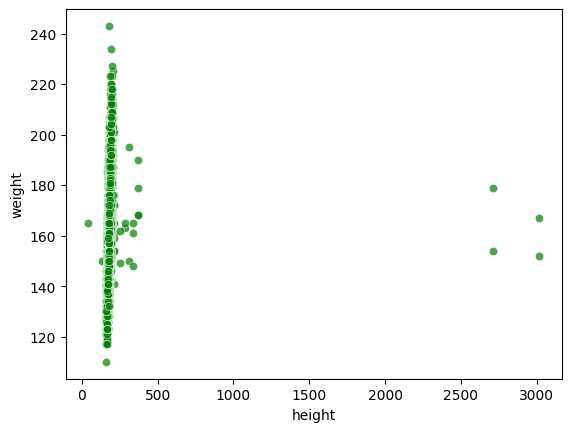

In [152]:
sns.scatterplot(x='height', y='weight',data=df, marker='o', color='g', alpha=0.7)

majority of height for the participants are same but weight varies

In [153]:
#dropping the columns that are not related to target column
df.drop(['player_id','name'],axis=1,inplace =True)

In [154]:
#encoding the categorical columns using get_dummies
cols = df[['gender','strong_foot','dedication_level','coaching']]
dm = pd.get_dummies(cols)

In [155]:
#dropping the columns and joing the enoceded data to main dataset
df.drop(['gender','strong_foot','dedication_level','coaching'],axis =1,inplace =True)

In [156]:
df = df.join(dm)

In [157]:
#importing Labelecnoder and Minmaxscaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
#creating Instances
le = LabelEncoder()
scaler = MinMaxScaler()

In [158]:
#labelencoding the country
df['country'] = le.fit_transform(df['country'])

In [163]:
#applying minmax scaler to all numerical columns
num_cols = ['age','height','weight','ball_controlling_skills','body_reflexes',
            'body_balance','jumping_skills','penalties_conversion_rate','mental_strength','goalkeeping_skills',
            'defending_skills', 'passing_skills', 'dribbling_skills','shot_accuracy', 'body_strength_stamina',
            'max_running_speed','behaviour_rating', 'matches_played', 'fitness_rating','trophies_won',
             'years_of_experience', 'no_of_disqualifications']
for c in num_cols:
  df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))

In [166]:
#splitting the dataset to dependent and independent variables
x = df.drop(['selection'],axis = 1)
y= df['selection']

In [171]:
#using the Traintestsplit to split train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y ,
                                   random_state=42,
                                   test_size=0.25)

In [175]:
#Importing Logistic Regression and Random Forest classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
rf = RandomForestClassifier()

In [179]:
from sklearn.metrics import accuracy_score

In [ ]:
#training the model
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)

In [178]:
#predictions from the trained model
lr_pred = lr.predict(x_test)
rf_pred = rf.predict(x_test)

In [184]:
#percentage accuracy in prediction for the models
print("Logistic Regression model accuracy:", accuracy_score(y_test,lr_pred)*100)
print("Random Forest model accuracy:", accuracy_score(y_test,rf_pred)*100)

Logistic Regression model accuracy: 76.90768791083167
Random Forest model accuracy: 84.79565590168619


In [185]:
#hyperparameters for logistic regression
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [186]:
#importing Gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)


In [ ]:
lr_new = grid.fit(x_train,y_train)

In [190]:
#Accuracy score after hyperparamater tuning
lr_new.best_score_

0.7695088683619099

In [189]:
#Bets Hyperparamter values for the Logistic Regression
lr_new.best_params_

{'C': 2.5, 'dual': False, 'max_iter': 140}

In [199]:
#Hyperparameters for Randomforest classifier
param_grids = {
'bootstrap': [True],
'max_depth': [80, 90, 100, 110],
'max_features': [2, 3],
'min_samples_leaf': [3, 4, 5],
'min_samples_split': [8, 10, 12],
'n_estimators': [100, 200, 300, 1000]}


In [201]:
#Using RandomizedSearchCV for obtaining best Hyperparameters
from sklearn.model_selection import RandomizedSearchCV
rf_new = RandomizedSearchCV(estimator = rf, param_distributions = param_grids, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Hyperparameter tuning of Randomforest classifier by fitting the train data
rf_new.fit(x_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=42, verbose=2)

In [202]:
#showing the best Parameters
rf_new.best_params_

{'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 90,
 'bootstrap': True}

In [203]:
#best score after hyperparameter tuning
rf_new.best_score_

0.8449738123876828

In [204]:
#Updating the best hyperparameters to the model
rf_bst = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 8,
 min_samples_leaf= 3,
 max_features= 3,
 max_depth= 90,
 bootstrap = True)

In [207]:
#Training the bestmodel
Rf_bst = rf_bst.fit(x_train,y_train)

In [209]:
#predicting the rsults
Rf_pred = Rf_bst.predict(x_test)
print("Random Forest model accuracy:", accuracy_score(y_test,Rf_pred)*100)

Random Forest model accuracy: 85.05287224921406


After hyperparameter tuning Accuracy score has slightly increased.

In [210]:
from sklearn.metrics import classification_report
print(classification_report(Rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1554
           1       0.88      0.85      0.86      1945

    accuracy                           0.85      3499
   macro avg       0.85      0.85      0.85      3499
weighted avg       0.85      0.85      0.85      3499

